# Notes

## 1. Where to Find Real Data

**Popular Open Data Repositories:**
 * UC Irvine Machine Learning Repository
 * Kaggle Datasets
 * Amazon's AWS datasets
 
**Meta Portals (They List Open Datasets):**
 * Data Portals
 * Open DataMonitor
 * Quandl

## 2. Look at the Big Picture

### A. Frame the Problem

* What is the business objective?
* What does the current solution look like (provides reference for performance)?
* Frame the problem - is it supervised, unsupervised, or reinforcement learning? Is it a classification task, a regression task, or something else? Should you use batch learning vs online learning?

### B. Common ML Notations

* **"m"** is the number of instance in the dataset you are measuring the performance measure on
* **"x(i)"** is the vector of all the feature values (excluding the label) of the "i"th instance in the dataset, and y(i) is the label (e.g the desired output value for that instance).
* **"X"** is the matrix containg all the feature values (excluding the labels) of all instances in the dataset. There is one row per isntance, and the "i"th row is equal to the tranpose of x(i), notated x(i)T.
* **h** is your system's prediction function, otherwise called a hypothesis.

### C. Choose a Performance Metric

For univariate regression (e.g predict only 1 label with multiple features), Root Mean Square Error (RMSE) is a common performance metric. RMSE gives an idea of how much error the system typically makes in it's predictions, with a heigher weight for larger errors.

## 3. Get the Data

### A. Download the Data

In [6]:
import os
import tarfile
import urllib
import pandas as pd

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join('datasets', 'housing')
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

### B. Look at the Data Structure.

In [7]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### C. Plot the Data

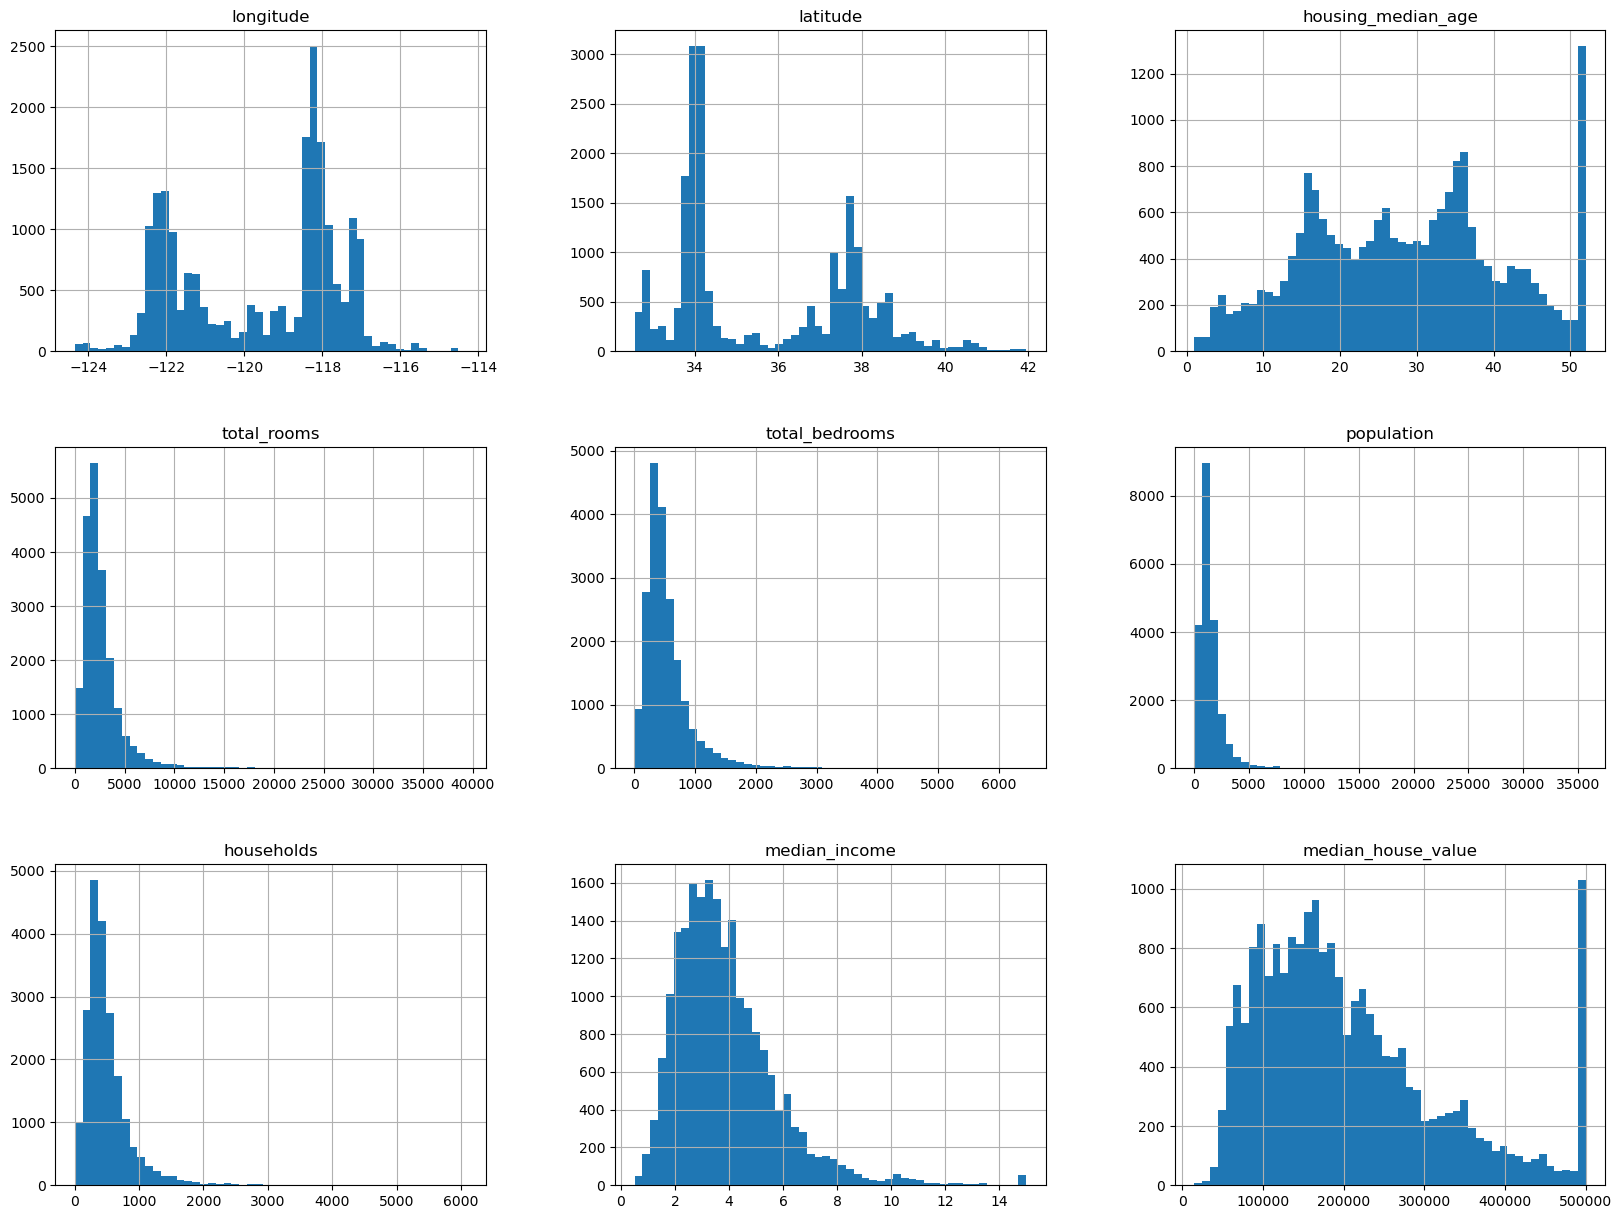

In [14]:
%matplotlib inline 
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))
plt.show()

### D. Create a Test Set of Data

Typical tests are 20% of the data

In [52]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indicies = np.random.permutation(len(data)) # Randomize the data
    test_set_size = int(len(data) * test_ratio) # Generate index based on test data % (e.g 4000 is 20% of 20K)
    test_indicies = shuffled_indicies[:test_set_size] # Grab first 4000 indicies of data for test data
    train_indicies = shuffled_indicies[test_set_size:] # Grab remainder of indicies for training data
    return data.iloc[train_indicies], data.iloc[test_indicies] # return data

In [55]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set))
print(len(test_set))

16512
4128


#### Problems with Solution

* Everytime you run the data, it returns a different dataset (because of randomizer).
* Could locally save dataset or generate a seed to ensure the data is randomized the same each time, but these solutions will break when we fetch updated data.
* Could also generate a hash based each instances identifier (if they have one) and then put that instance in the test set of the hash is lower than or equal to 20% of the maximum hash value, which will ensure that the test set remains consistent across multiple runs even with a refreshed dataset.

Scikit-Learn provies built in methods to split training & test data:

In [56]:
from sklearn.model_selection import train_test_split

# random_state parameter specifies the random generator seed
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

Random sampling is generally fine if the dataset is large enough, but if it is small, you run the risk of signficant sampling bias.

To overcome this, typically stratified sampling is used - the dataset is divided into subgroups called strata, and the right number of instances are sampled from each stratum to gaurentee that the test set is representative of the overall population.

Suppose you chatted with experts about your data and they determined that median income is a very important attribute to predict median housing prices. You may want to ensure that the test set is representative of the various categories of income in the whole dataset. Since median income is a continuous numerical attribute, you would need to create an income category attribute to use in each stratum:

<Axes: >

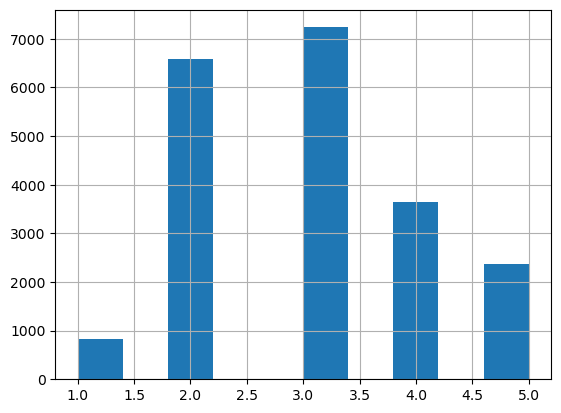

In [58]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0, 1.5, 3.0, 4.5, 6, np.inf], labels=[1,2,3,4,5])
housing["income_cat"].hist()

In [59]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [61]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

Remove the created data attribute once you have successfully stratified sampled.

In [63]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## 4. Discover & Visualize the Data to Gain Insights

Make sure you are only exploring the training data and put the test set aside. You may want to make a copy of the training data in case you want to make temporary manipulations.

In [64]:
housing_copy = strat_train_set.copy()

### Visualize the Data

<Axes: xlabel='longitude', ylabel='latitude'>

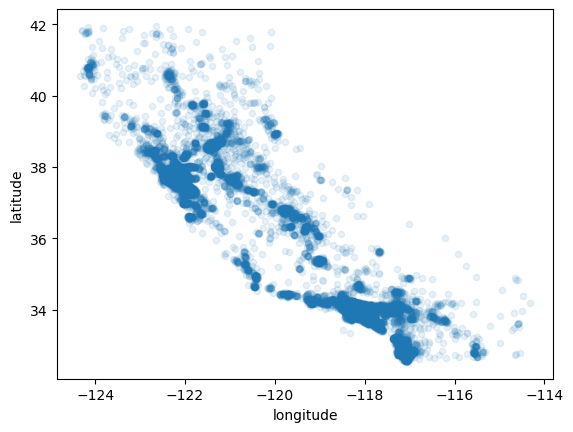

In [69]:
housing_copy.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

This plot tells the density of houses is mainly centered around Los Angeles and San Francisco

<Axes: xlabel='longitude', ylabel='latitude'>

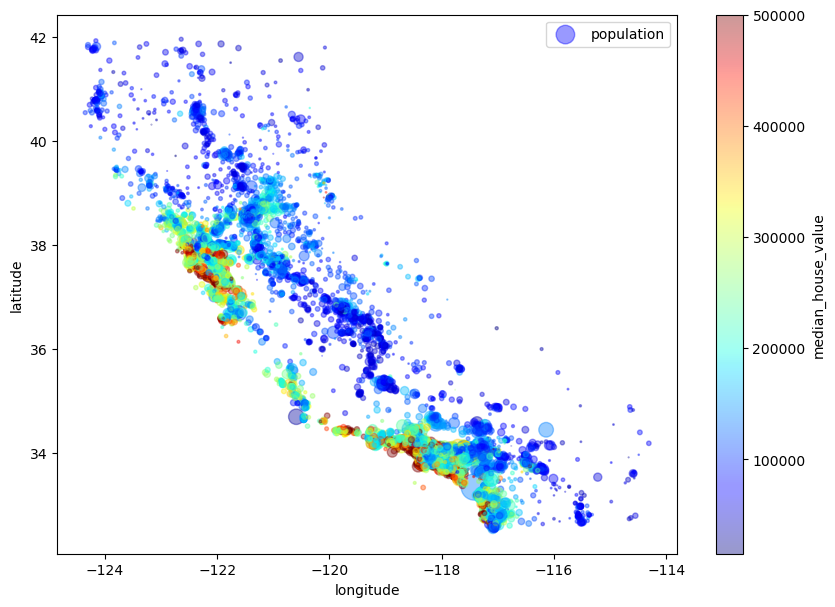

In [72]:
housing_copy.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    alpha=0.4,
    s=housing_copy["population"] / 100,
    label="population",
    figsize=(10,7),
    c="median_house_value",
    cmap=plt.get_cmap("jet"),
    colorbar=True
)

This plot tells the housing prices are very much correlated to the location (e.g proximity to the ocean) and the population density.

### Looking for Correlations

Since the dataset is not too large, we can easily compute the standard correlation coefficeint (also called Pearson's) between every pair of attribute. The correlation ranges from -1 to 1, with values closer to 1 indicating a stronger correlation.

In [75]:
corr_matrix = housing_copy.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

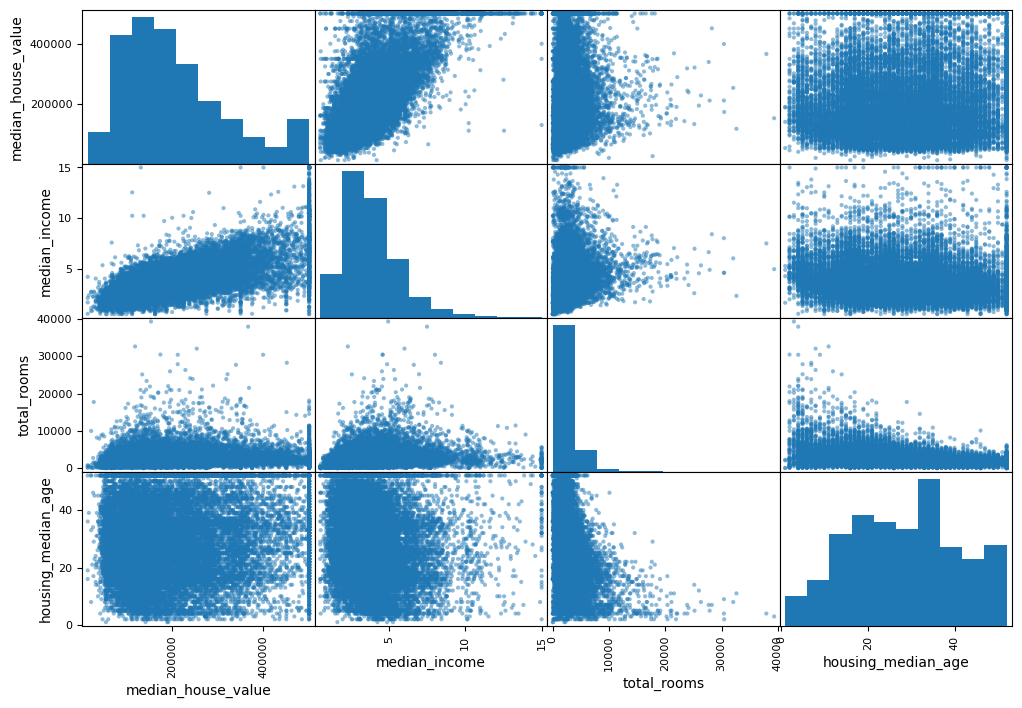

In [76]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

The most promising attribute to predict the median house value is the median income, so let's zoom in on that.

<Axes: xlabel='median_income', ylabel='median_house_value'>

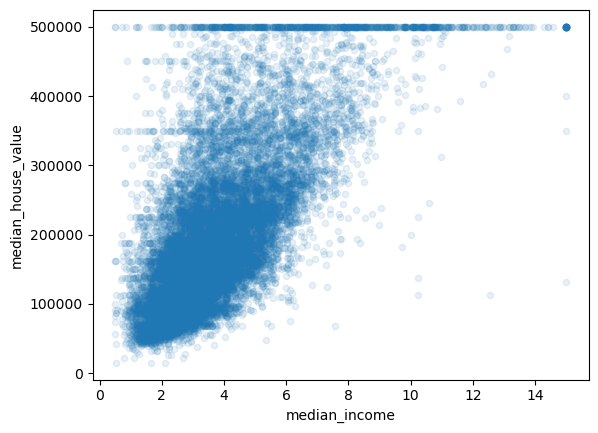

In [77]:
housing_copy.plot(
    kind="scatter",
    x="median_income",
    y="median_house_value",
    alpha=0.1
)

This plot reveals a few things:

* The correlation between median_income & median_house_value is very strong as indicated by the upward trend
* There are several price caps noticable in the dataset that we may want to remove as indicated by the horizontal lines in order to produce an algorith without those data quirks.

### Experimenting with Attribute Combinations

There may attributes or features in the dataset that by themselves don't have a linear connection with the target attribute, but by combining with other attributes, could hold relevance. For example, the total number of rooms in a district is not very helpful if you don't know how many households there are. Therefore, what we really want is the number of rooms per household which could have a stronger correlation to the median_house_value.

In [79]:
housing_copy["rooms_per_household"] = housing_copy["total_rooms"] / housing_copy["households"]
housing_copy["bedrooms_per_room"] = housing_copy["total_bedrooms"] / housing_copy["total_rooms"]
housing_copy["population_per_household"] = housing_copy["population"] / housing_copy["households"]

In [84]:
corr_matrix = housing_copy.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

This shows that the new bedrooms_per_room attribute is much more correlated with the median house value than the total number of rooms or bedrooms. It indicates that houses with a lower bedroom/room ratio tend to be more expensive.

The number of rooms per household is also more informative than the total number of rooms in a district - obviously, the more rooms in a house generally the more expensive it will be.

## Prepare the Data For Machine Learning Algorithms

Generally, functions are better perparing the data than doing it manually for several reasons:
    
* Functions allows for reprodcible transformations on any dataset.
* You will gradually build a library of transformation functions that you can use on any dataset.
* You can use functions in your live system to transform the new data before feeding to the algoritm.
* Functions make it possible to try various transformations and see which combination of transformations work best.

But first, revert to a clean training set and seperate the features and labels:

In [85]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

### Data Cleaning

Most ML Algorithms cannot take care of missing features (like the total bedrooms attribute). We have 3 options to fix this:

1. Get rid of the corresponding disctricts
2. Get rid of the whole attribute
3. Set the values to some value (like zero or median)

In [86]:
housing.dropna(subset=["total_bedrooms"]) # Option 1
housing.drop('total_bedrooms', axis=1) # Option 2
median = housing["total_bedrooms"].median() # Option 3
housing["total_bedrooms"].fillna(median, inplace=True)

Scikit Learn provies a handy class to take care of missing values - **SimpleImputer**:

In [99]:
from sklearn.impute import SimpleImputer

# Create instance of 'SimpleImputer' with strategy
imputer = SimpleImputer(strategy="median")

# Create copy of the data with only numerical values
housing_num = housing.drop("ocean_proximity", axis=1)

# Fit the Imputer Instance to the training data
imputer.fit(housing_num)

print(imputer.statistics_)
print(housing_num.median().values)

# Transform training set's missing values with learn medians
X = imputer.transform(housing_num)

housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_tr

[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]
[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


### Scikit Learn Design & Terminology

* **Estimators**: Any object that can estimate some parameters based on a dataset is called an estimator (like the imputer).
* **Transformers**: Estimators that transform a datase via the "transform" method.
* **Predictors**: Estimators that given a dataset are capable of making a prediction via the "predict" method. For example, the LinearRegression model is a predictor.
* **Estimators**: Any object that can estimate some parameters based on a dataset is called an estimator (like the imputer).

## Handling Text & Categorical Attributes

In [100]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head()

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN


Most ML algorithms prefer to work with numbers, so convert categorical attributes to numbers (if text isn't categorical, think about pre-processing):

In [101]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [102]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

One issue with this represenation is that most ML algo's will asume that two nearby values are more similar than two distant values, which may not be the case. This may be fine in some cases (e.g "average", "good", "excellent"), but it is not the case for ocean proximity in this dataset.

To fix this issue, a common solution is called One Hot Encoding, which is to create one binary attribute per category: one attribute equal to 1 when the category is "1H Ocean" (and 0 otherwise, and another attribute equal to 1 when category is inland (and 0 otherwise), ect.

In [106]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [108]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [109]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Custom Transformers

In [114]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # NO *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X , y=None):
        return self
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_etra_attribs = attr_adder.transform(housing.values)

housing_etra_attribs

array([[-121.46, 38.52, 29.0, ..., 'INLAND', 5.485835694050992,
        3.168555240793201],
       [-117.23, 33.09, 7.0, ..., 'NEAR OCEAN', 6.927083333333333,
        2.6236979166666665],
       [-119.04, 35.37, 44.0, ..., 'INLAND', 5.3933333333333335,
        2.223333333333333],
       ...,
       [-122.72, 38.44, 48.0, ..., '<1H OCEAN', 4.1104651162790695,
        2.6627906976744184],
       [-122.7, 38.31, 14.0, ..., '<1H OCEAN', 6.297405189620759,
        2.411177644710579],
       [-122.14, 39.97, 27.0, ..., 'INLAND', 5.477157360406092,
        3.1725888324873095]], dtype=object)

## Feature Scaling

With very few exceptions, ML algo's don't perform well when the input numerical attributes have very different scales. This is the case with our housing data: the total # of rooms range from 6 to 39,320 while median incomes only range from 0 to 15 (note that scaling the target values is generally not required).

There are two common ways to get all attributes to have the same scale - **min-max scaling e.g normalization** and **standardization**.

**min-max**: values are shifted and rescaled so the range from 0 to 1, which is done by subtracting the min value and dividing by the max minus the min. Sklearn provides a tranformer called MinMaxScaler for this purpose.

**Standardization**: Does not bound to a specific range but is much less affected by outliers. Calculated by subtracting X by the mean value, and then dividing by the standard deviation. Sklearn provides a tranformer called StandardScaler for this purpose.

## Transformation Pipelines

Given that there could be many transformation steps a given dataset has to go through before it is ready for an ML algo, Sklearn provides the PipeLine class to help with such sequences of tranformations:

In [120]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

So far, we have handled the transforming the categorical columsn and the numerical columns seperatly - ScikitLearn provides an easy way to handle this together:

In [123]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

## Select and Train a Model

### Training & Evaluating on the Training Set

Let's first train a linear regression model & try it out on a few instances of the training set

In [128]:
from sklearn.linear_model import LinearRegression

# Create Model
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

# Test Some Predictions to gauge accuracy
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print(f"Predictions: {lin_reg.predict(some_data_prepared)}")
print(f"Labels: {list(some_labels)}")

Predictions: [ 86208. 304704. 153536. 185728. 244416.]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


Our labels are not exactly accurate - some are off by almost 20% or more in some cases. 

Let's measure the RMSE on the whole training set:

In [131]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_rmse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_rmse)
print(f"Typical Prediction Error is ${lin_rmse}")

Typical Prediction Error is $68633.40810776998


This an example of the model underfitting the training data - it can mean the that the features do not provide enough information to make good predictions, or that the model is not powerfurl enough.

The main ways to fix underfitting ar eto select a more powerful model, feed the training algo with better deatures, or reduce the constraints on the model.

Let's try a more complex model, a DecisiontreeRegressor.

In [134]:
from sklearn.tree import DecisionTreeRegressor

# Train the model
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

# Test a few predictions to gauge accuracy
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print(f"Predictions: {tree_reg.predict(some_data_prepared)}")
print(f"Labels: {list(some_labels)}")

Predictions: [ 72100. 279600.  82700. 112500. 238300.]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [135]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_mse = np.sqrt(tree_mse)
print(f"Typical Prediction Error is ${tree_mse}")

Typical Prediction Error is $0.0


A Prediction error of $0 most likely means we badly overfit the data.

In order to avoid this, we need to use part of teh training set training the model and part of it for validatin the model.

## Better Evaluation Using Cross Validation

A great way to validate the model is to use Scikit-Learn's K fold cross validation feature. The following code randomly splits the training set into 10 distinct subsets called "folds", then it trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluatino every time and training on the other 9 folds. The result is an array containg the 10 evaluation scores:

In [140]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print(f"Scores: {scores}")
    print(f"Mean: ${scores.mean()}")
    print(f"Standard Deviation: ${scores.std()}")
    
display_scores(tree_rmse_scores)

Scores: [72994.08502882 68718.09427942 68353.59326664 70170.30536043
 68925.74290353 76939.95332871 70596.97794364 72796.2859027
 66374.17142065 72962.23398226]
Mean: $70883.14434167978
Standard Deviation: $2914.8256943178817


Now the Decision Tree doesn't look so good - it's mean error is ~$70K compared ~$68K. Let's compute the scores for the Linear Regression Model to compare:

In [141]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

Scores: [71800.38078269 64114.99166359 67844.95431254 68635.19072082
 66801.98038821 72531.04505346 73992.85834976 68824.54092094
 66474.60750419 70143.79750458]
Mean: $69116.4347200802
Standard Deviation: $2880.6588594759014


Let's try one last model, the RandomForestGenerator.

In [143]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

# Test a few predictions to gauge accuracy
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print(f"Predictions: {forest_reg.predict(some_data_prepared)}")
print(f"Labels: {list(some_labels)}")

Predictions: [ 75200.   305482.02  82991.   122564.   232712.  ]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [144]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

Scores: [51380.11982625 49279.36462025 46785.78254287 51905.83296029
 47483.14281638 51742.41191172 52409.62817157 50090.7800204
 48270.79140942 53680.39379921]
Mean: $50302.82480783644
Standard Deviation: $2172.348722797231


While this looks better, you should try out multiple different models with the goal of shortlisting a few promising models (2 - 5).

### Saving Models for future reference

In [146]:
import joblib

joblib.dump(forest_reg, 'forest_reg.pkl')
# And later...
forest_reg = joblib.load('forest_reg.pkl')

## Fine-Tune Your Model

### Grid Search

Grid search searches for the best combinations of hyperparameter values

In [150]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [151]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [153]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(f"MSE is ${np.sqrt(-mean_score)}", params)

MSE is $64113.61820239057 {'max_features': 2, 'n_estimators': 3}
MSE is $55164.93300651711 {'max_features': 2, 'n_estimators': 10}
MSE is $52849.17923165508 {'max_features': 2, 'n_estimators': 30}
MSE is $60339.581210046235 {'max_features': 4, 'n_estimators': 3}
MSE is $52770.9818325151 {'max_features': 4, 'n_estimators': 10}
MSE is $50783.66945335392 {'max_features': 4, 'n_estimators': 30}
MSE is $58415.687267130605 {'max_features': 6, 'n_estimators': 3}
MSE is $52304.03618106995 {'max_features': 6, 'n_estimators': 10}
MSE is $49948.088586542726 {'max_features': 6, 'n_estimators': 30}
MSE is $58609.01291365901 {'max_features': 8, 'n_estimators': 3}
MSE is $52237.9852080023 {'max_features': 8, 'n_estimators': 10}
MSE is $49943.14459047959 {'max_features': 8, 'n_estimators': 30}
MSE is $63087.28416772016 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
MSE is $54611.699464703765 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
MSE is $59319.91996142104 {'bootstrap':

### Other methods for Fine-Tuning A Model:

* **Randomized Search**: Bettor for larger datasets.
* **Ensenbmle Methods**: Combine different models that peform the best 

## Analyze the Best Models and Their Errors

You can gain good insights on the problem you are trying to solve by inspecting each model. For example, the RandomForestRegressor can indicate the relative importants of each attribute for making accurate predictions

In [154]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.01145821e-02, 6.68865464e-02, 4.28023355e-02, 1.50993753e-02,
       1.52487632e-02, 1.50361412e-02, 1.47940196e-02, 3.66845653e-01,
       6.11703772e-02, 1.13141935e-01, 5.55458224e-02, 5.05540305e-03,
       1.52074768e-01, 5.41165575e-05, 2.29342778e-03, 3.83673428e-03])

In [156]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.36684565279573195, 'median_income'),
 (0.15207476811062748, 'INLAND'),
 (0.11314193456262694, 'pop_per_hhold'),
 (0.07011458207609506, 'longitude'),
 (0.06688654641348338, 'latitude'),
 (0.06117037724233453, 'rooms_per_hhold'),
 (0.055545822355204846, 'bedrooms_per_room'),
 (0.04280233545247839, 'housing_median_age'),
 (0.015248763223380144, 'total_bedrooms'),
 (0.015099375305909704, 'total_rooms'),
 (0.015036141216037894, 'population'),
 (0.014794019577907103, 'households'),
 (0.00505540305029226, '<1H OCEAN'),
 (0.003836734281763336, 'NEAR OCEAN'),
 (0.0022934277786497677, 'NEAR BAY'),
 (5.411655747722354e-05, 'ISLAND')]

With this information, we may choose to drop some of the less useful features. This data can also inform why our system is making certain errors so we can try to fix them.

## Evaluate Your System on the Test Set

In [161]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(f"Final RMSE: ${final_rmse}")

Final RMSE: $47814.82806863733


Figure out how precise the estimate is:

In [168]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, 
                         len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45837.27033271, 49713.78294712])

# Homework

## 1. Support Vector Machine Regressor

In [173]:
from sklearn.svm import SVR

# Train the model
# svr_reg = SVR(kernel="linear")
svr_reg = SVR(kernel="rbf")
svr_reg.fit(housing_prepared, housing_labels)

# Test a few predictions to gauge accuracy
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print(f"Predictions: {svr_reg.predict(some_data_prepared)}")
print(f"Labels: {list(some_labels)}")

Predictions: [178735.52743945 180008.04960479 178900.87534272 178924.11179761
 179998.97535925]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


## 2. Randomized Search

In [174]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]},
]

forest_reg = SVR()

grid_search = RandomizedSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

ValueError: Invalid parameter 'n_estimators' for estimator SVR(). Valid parameters are: ['C', 'cache_size', 'coef0', 'degree', 'epsilon', 'gamma', 'kernel', 'max_iter', 'shrinking', 'tol', 'verbose'].